# Custom annotation for notehead, system and barline for score following

In [6]:
import os
import numpy as np
import cv2
# import time
import matplotlib.pyplot as plt

### Sample 

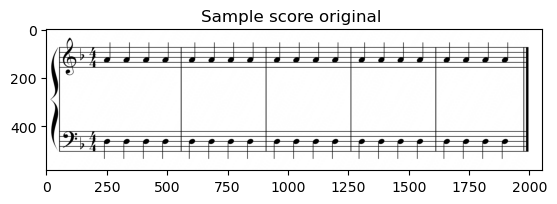

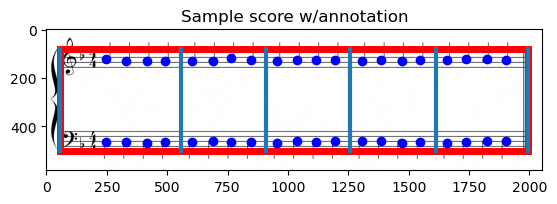

In [16]:
# Sample score
file = './101.png'
img = cv2.imread(file)
plt.title('Sample score original ')
plt.imshow(img);


# Sample annotation
notes = np.load('./notes.npy',allow_pickle=True)
sys = np.load('./sys.npy',allow_pickle=True)
bar = np.load('./bar.npy',allow_pickle=True)


fig, ax = plt.subplots()
plt.imshow(img)
plt.title('Sample score w/annotation')


### Note annotation
for j in range (len(notes)):
    plt.plot(notes[j][0], notes[j][1], 'bo')
    
    
### System annotation 
xy = (sys[0][0],sys[1][1] )
width = sys[2][0] - sys[0][0]
height = sys[0][1] - sys[1][1]
    
r = plt.Rectangle(xy, width, height, fill = False,
                 color = 'r', lw = 5)

ax.add_patch(r)

    
### Bar annotation

for i in range (len(bar)): 
    plt.axvline(bar[i],sys[0][1]/img.shape[0],sys[1][1]/img.shape[0], lw = 3)

# Change directory

- Set song to .png of unrolled sheet music
- Set data_dir to directory of data


Save directory exists:  /Users/chuk/Desktop/SF_Dataset/data/050/annotation/
/Users/chuk/Desktop/SF_Dataset/data/050/050img.png


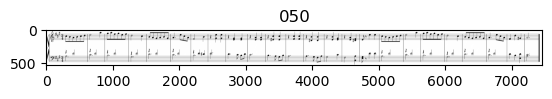

In [29]:
####
#### CHANGE SONG HERE
####
song = '050' 

####
#### CHANGE DIRECOTRY HERE
####
data_dir = '/Users/chuk/Desktop/SF_Dataset/data/' + song + '/'



save_dir = data_dir + 'annotation/'

# Check save_dir or create directory if does not exist 
if os.path.isdir(save_dir) != True :
    print("Create following directory: ",save_dir)
else: 
    print("Save directory exists: ",save_dir)
    
    
# Load score to be annotated 

file = data_dir + song + 'img.png'
print(file)
img = cv2.imread(file)
plt.title(song)
plt.imshow(img);

## Function to display circle on click location

- Displays red circle on click location
- Saves xy-coordinate to array

In [22]:
# Function to annotate notes and put circle marker for each notehead 
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,",",y)
        refPt.append([x,y])
        cv2.circle(img, (x,y), 10, (0,0,255), 5)
        cv2.imshow("image", img)

### NOTES

Annotate notehead

- Click the noteheads in decending pitch order from the first to last beat.
- 1st Key press to save
- 2nd Key press to close window

In [23]:
# Reset img 
img = cv2.imread(file)

In [24]:
# Array to store notehead xy-coordinates 
refPt = []

# Show window
cv2.namedWindow("image") 
cv2.moveWindow("image", 2,2)
cv2.imshow("image", img)

# Update cv2 window when mouse is clicked 
cv2.setMouseCallback("image", click_event)


# Save array to .npy on any keypress
cv2.waitKey()

note_ary =refPt

# Align annotation x-coordinates if notehead plays on the same beat (for MIDI alignment purpose) 
for i in range (len(note_ary)):
    if i != 0:
        now = note_ary[i][0]
        pre = note_ary[i-1][0]
        if np.abs(pre-now) < 30:
            note_ary[i][0] = note_ary[i-1][0]

            
# np.save(notes_dir, note_ary)
print("saved notes")


# One more keypress to close window 
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

245 , 127
254 , 466
saved notes


-1

### SYSTEM

Annotate system 

- Click the top left, bottom left, top right, bottom right corners of the system in order
- 1st Key press to save
- 2nd Key press to close window

In [21]:
# Reset img 
img = cv2.imread(file)

In [22]:
# Store xy-coordinates of system 
refPt = []


# System Annotation
cv2.namedWindow("image") 
cv2.moveWindow("image", 0,0)
cv2.imshow("image", img)

#calling the mouse click event
cv2.setMouseCallback("image", click_event)


# Save array to .npy on any keypress
cv2.waitKey()

sys_ary = refPt
# Align annotation x-coordinates for clearer annotation
for i in range (len(sys_ary)):
    if i != 0:
        now = sys_ary[i][0]
        pre = sys_ary[i-1][0]
        #print(i)
        if np.abs(pre-now) < 30:
            sys_ary[i][0] = sys_ary[i-1][0]
            
#np.save(sys_dir, sys_ary)
print(':saved system:')

# One more keypress to close window 
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

247 , 122
217 , 387
:saved system:


-1

### BARS

Annotate barlines (excluding the outer rims of the system)

- Start from the barline connecting bar 1 and 2
- Click top of barline, then bottom of barline
- Continue onto next bar
- 1st Key press to save
- 2nd Key press to close window

In [5]:
# Bar Annotation
refPt = []
refPt.append(sys_ary[0][0])
                
cv2.namedWindow("image") 
cv2.moveWindow("image", 0,0)
cv2.imshow("image", img)

#calling the mouse click event
cv2.setMouseCallback("image", click_event)

cv2.waitKey()

bar_ary =refPt

refPt.append(sys_ary[len(sys_ary)-1][0])

#np.save(bar_dir, bar_ary)

print("saved bar")

cv2.destroyAllWindows()
cv2.waitKey(1)

559 , 307
908 , 314
1258 , 284
1612 , 285
saved bar


-1

In [25]:
# Close all windows
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
# Load annotated image for checking 

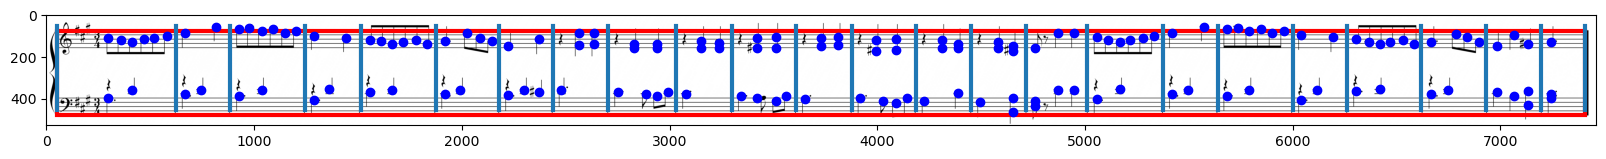

In [30]:
notes_dir = save_dir + 'notes'
sys_dir = save_dir + 'sys'
bar_dir = save_dir + 'bar'

notes = np.load(notes_dir + '.npy',allow_pickle=True)
sys = np.load(sys_dir + '.npy',allow_pickle=True)
bar = np.load(bar_dir + '.npy',allow_pickle=True)

##SHOW TO CHECK

fig, ax = plt.subplots(figsize=(20,15))
plt.figsize=(20,20)

plt.imshow(img)



for j in range (len(notes)):
    plt.plot(notes[j][0], notes[j][1], 'bo')
    
    
#####
xy = (sys[0][0],sys[1][1] )
width = sys[2][0] - sys[0][0]
height = sys[0][1] - sys[1][1]
    
r = plt.Rectangle(xy, width, height, fill = False,
                 color = 'r', lw = 3)

ax.add_patch(r)

    
###############################################

for i in range (len(bar)): 
    plt.axvline(bar[i],sys[0][1]/img.shape[0],sys[1][1]/img.shape[0], lw = 3)

###############################################